In [ ]:
import re
import numpy as np
import pandas as pd

import nltk
nltk.download('reuters')
from nltk.corpus import reuters
from nltk.corpus import wordnet

def collection_stats():
  # List of documents
  documents = reuters.fileids()
  print(str(len(documents)) + " documents");
  train_docs = list(filter(lambda doc: doc.startswith("train"),documents));
  print(str(len(train_docs)) + " total train documents");
  test_docs = list(filter(lambda doc: doc.startswith("test"),documents));
  print(str(len(test_docs)) + " total test documents");
  # List of categories
  categories = reuters.categories();
  print(str(len(categories)) + " categories in total");
  print("========")

collection_stats()
  

[nltk_data] Downloading package reuters to /root/nltk_data...


10788 documents
7769 total train documents
3019 total test documents
90 categories in total


In [ ]:
#@title Default title text
categories = reuters.categories()
for i in range(90):
  print("                                  ")
  print("%d ==> " %(i) + categories[i]  )
  print( str(len(reuters.fileids(categories[i] ))) + " adet doc iceriyor.")

In [ ]:
#@title Default title text
categories = reuters.categories()
for i in range(90):
  print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
  print("%d. kategori ==> " %(i) + categories[i]  )
  print( str(len(reuters.fileids(categories[i] ))) + " adet doc iceriyor.")

  category_docs = reuters.fileids(categories[i] );
  # Words for a document
  #her sinif icin bir adet doküman goruntule
  id = 0
  document_id = category_docs[id]
  
  
  #bu dokumanin dahil oldugu diger kategoriler
  print("bu dokumanin dahil oldugu diger kategoriler")
  print(str(reuters.categories(document_id)))
  
  
  # Raw document
  print("\n+++++++++\nRAWDOC")
  print(reuters.raw(document_id));
  

Preprocessing Başlangıcı

In [ ]:
def decontracted(phrase):
  """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""

  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"won\’t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)

  phrase = re.sub(r"n\’t", " not", phrase)
  phrase = re.sub(r"\’re", " are", phrase)
  phrase = re.sub(r"\’s", " is", phrase)
  phrase = re.sub(r"\’d", " would", phrase)
  phrase = re.sub(r"\’ll", " will", phrase)
  phrase = re.sub(r"\’t", " not", phrase)
  phrase = re.sub(r"\’ve", " have", phrase)
  phrase = re.sub(r"\’m", " am", phrase)

  return phrase

from nltk.corpus import stopwords
nltk.download('stopwords')
nltkstopwords = set(stopwords.words('english'))

other = set(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])



stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', \
                "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', \
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", \
                'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', \
                'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', \
                'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', \
                'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
                'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', \
                'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', \
                'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', \
                'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', \
                'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", \
                'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", \
                'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', \
                "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', \
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", \
                'weren', "weren't", 'won', "won't", 'wouldn', 'not', 'cannot', "wouldn't", ])

# ref: https://gist.github.com/sebleier/554280

stopwords.update(nltkstopwords)
stopwords.update(other)
#print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
lem = WordNetLemmatizer()

def get_wordnet_pos(word):
  """Map POS tag to first character lemmatize() accepts"""
  tag = nltk.pos_tag([word])[0][1][0].upper()
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}
  return tag_dict.get(tag, wordnet.NOUN)

def lem_text(text_data):
  """lem_text takes text and lemmatize it using WordNetLemmatizer.
     ref: https://stackoverflow.com/a/25535348"""

  n_text = []
  for word in text_data.split(' '):
    #n_word = lem.lemmatize(word, pos='a')
    #n_word = lem.lemmatize(n_word, pos='v')
    n_word = lem.lemmatize(word, get_wordnet_pos(word))
    

    n_text.append(n_word)

  return ' '.join(n_text)

def remove_special_character(phrase, remove_number=False):
  """remove_special_character takes text and removes special charcters.
     ref: https://stackoverflow.com/a/18082370/4084039"""

  phrase = re.sub("\S*\d\S*", "", phrase).strip()
  if remove_number:
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)
  else:
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
  return phrase

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
#Tokenize returns a list of stems that appear in the text that was passed as an argument. 
#Stop-words are filtered out, as well as words that are too short. Furthermore, any string that contains other than letters is removed (e.g., numbers).

letters = re.compile('[a-zA-Z]+');

import string

def tokenize(text):
  w = decontracted(text)
  w = w.translate(str.maketrans('', '', string.punctuation))
  w = remove_special_character(w)
  w = ' '.join(e.lower() for e in w.split() if e.lower() not in stopwords)
  token = lem_text(w)
  token = word_tokenize(token)
  return token

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
sample_text = "Hey veg-oil he she 5010 tl 5tl 5$ There! prices Haven't have not isn't Crazy, Feet foot better, bats This is a the Sample review, which 123happens {blah}%456 to contain happened punctuations headed head headed universal rights of right contained."
print(tokenize(sample_text))

['hey', 'vegoil', 'price', 'crazy', 'foot', 'foot', 'bat', 'sample', 'review', 'happen', 'punctuation', 'head', 'head', 'head', 'universal', 'right', 'contain']


Preprocessing Sonu

Veriyi List'e Alma

In [ ]:
text_train = []
text_test = []
total_text= []
total_labels =[]
train_labels = []
test_labels = []


docs_id = reuters.fileids()
train_docs_id = list(filter(lambda doc: doc.startswith("train"),docs_id))
test_docs_id = list(filter(lambda doc: doc.startswith("test"),docs_id))

for doc_id in reuters.fileids():
  if doc_id.startswith("train"):
    text_train.append(reuters.raw(doc_id))
    train_labels.append(reuters.categories(doc_id))
    
    total_text.append(reuters.raw(doc_id))
    total_labels.append(reuters.categories(doc_id))
  else:
    text_test.append(reuters.raw(doc_id))
    test_labels.append(reuters.categories(doc_id))
    total_text.append(reuters.raw(doc_id))
    total_labels.append(reuters.categories(doc_id))


In [ ]:
adet = 10788 #@param {type:"slider", min:3000, max:10788, step:1}
text = total_text[:adet]
labels = total_labels[:adet]


Vektörleştirme

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconvert = TfidfVectorizer(analyzer=tokenize, ngram_range=(1,3)).fit(text)

transformedDocs = tfidfconvert.transform(text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:532: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


K-MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Sum_of_squared_distances = []
sil = []
K = range(2,200)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(transformedDocs)
  Sum_of_squared_distances.append(km.inertia_)
  
  tmplabels = km.labels_
  sil.append(silhouette_score(transformedDocs, tmplabels, metric = 'cosine'))

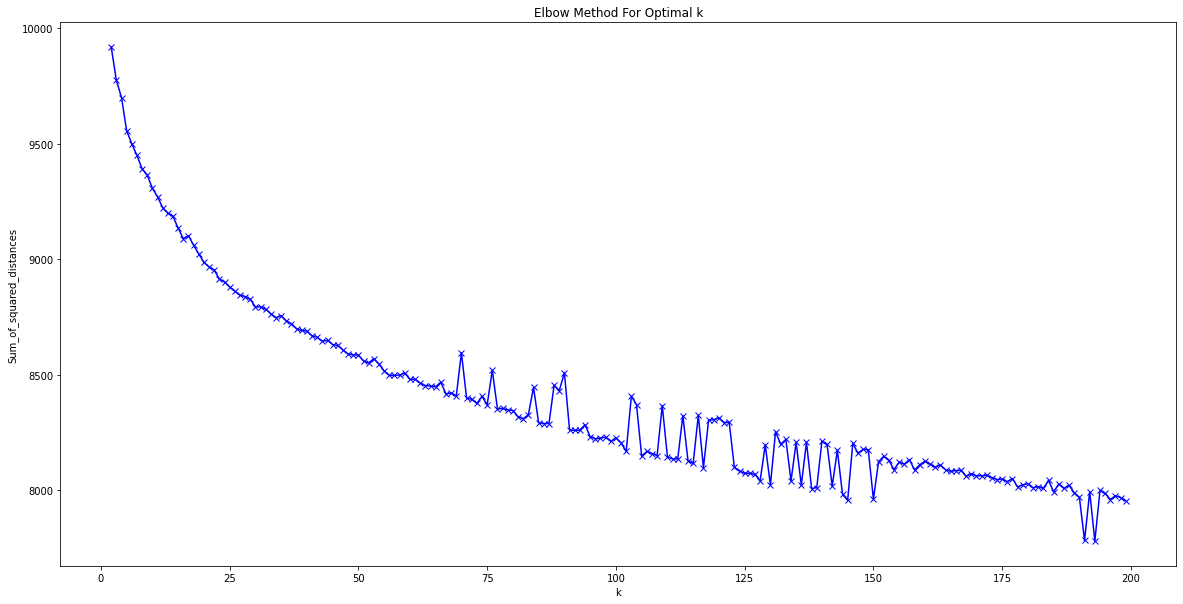

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

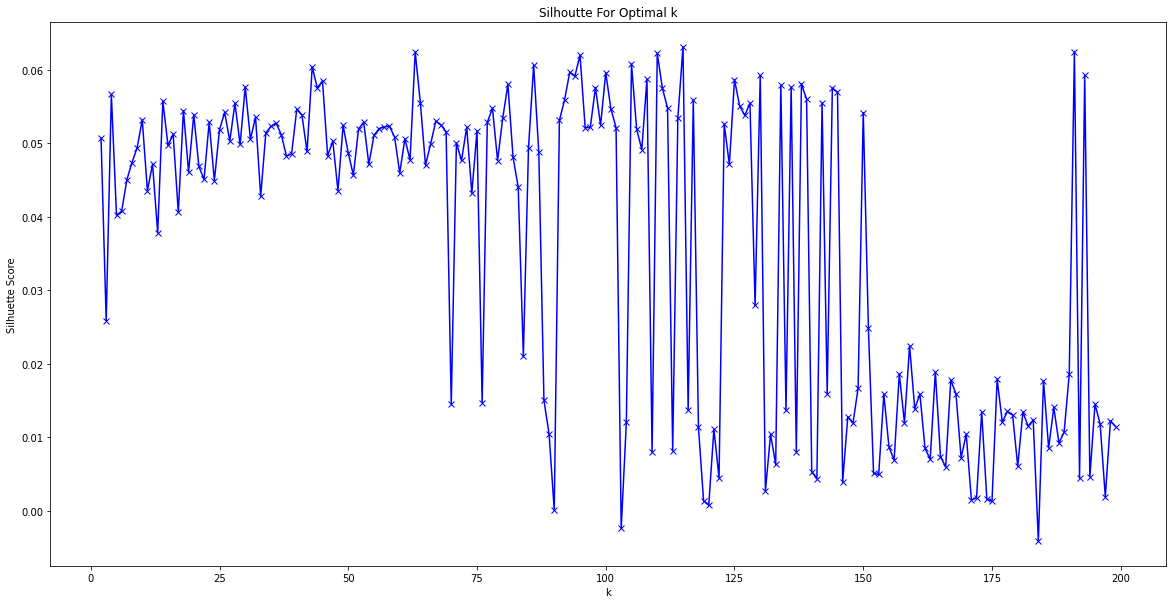

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(K,sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhuette Score')
plt.title('Silhoutte For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kumesayi = 30 #@param {type:"integer"}
modelkmeans = KMeans(n_clusters=kumesayi, init='k-means++', n_init=100)
y = modelkmeans.fit_predict(transformedDocs)
#y burada kümeleri temsil ediyor.

In [ ]:
clusters = modelkmeans.labels_.tolist()
from collections import Counter
Counter(modelkmeans.labels_)

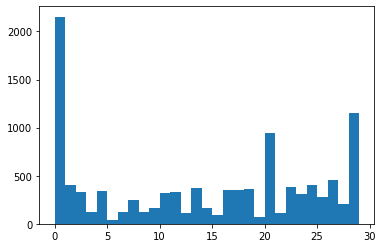

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y, bins=range(kumesayi))
plt.show()

Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


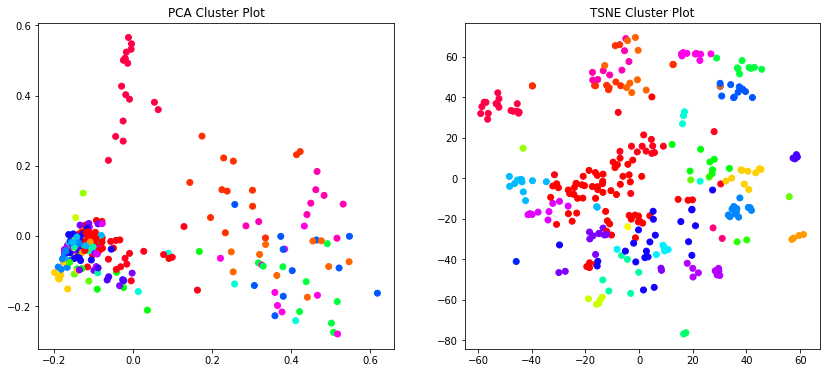

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(transformedDocs, y)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(', '.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(transformedDocs, y, tfidfconvert.get_feature_names(), 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 1
share, sale, acquire, sell, acquisition, mln, unit, dlrs, corp, company

Cluster 2
corp, sale, dlrs, note, mln, rev, qtr, shr, net, ct

Cluster 3
avg, mths, qtr, billion, rev, ct, shr, dlrs, net, mln

Cluster 4
grade, pct, production, foot, silver, ore, coin, ton, ounce, gold

Cluster 5
unemployment, inflation, fell, december, year, price, january, february, rise, pct

Cluster 6
sao, mm, stcks, soybean, tonne, shr, loss, rev, net, nil

Cluster 7
raw, cargo, tender, intervention, ecus, rebate, trader, white, tonne, sugar

Cluster 8
board, ct, share, april, record, payable, declare, stock, split, dividend

Cluster 9
fund, add, billion, dlrs, week, federal, customer, reserve, repurchase, fed

Cluster 10
market, sumita, currency, intervene, tokyo, japan, dealer, bank, yen, dollar

Cluster 11
bank, franc, net, reserve, deficit, rise, surplus, mln, dlrs, billion

Cluster 12
profit, year, qtr, dlrs, rev, shr, net, mln, ct, loss

Cluster 13
meeting, ibc, brazil, producer, colombia, 

yararlanılan kaynaklar:

https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

https://miguelmalvarez.com/2016/11/07/classifying-reuters-21578-collection-with-python/

DBSCAN

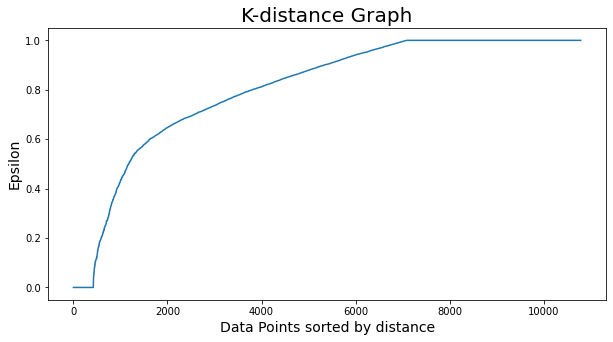

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(transformedDocs)

neigh_dist, neigh_ind = nbrs.kneighbors(transformedDocs)

sort_neigh_dist = np.sort(neigh_dist, axis=0)

sort_neigh_dist = sort_neigh_dist[:,1]

plt.figure(figsize=(10,5))
plt.plot(sort_neigh_dist)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
distance_array = pairwise_distances(transformedDocs, metric='cosine')

from sklearn.cluster import DBSCAN
modeldbcluster = DBSCAN(eps=0.57, min_samples=2, metric='precomputed')
dby = modeldbcluster.fit_predict(distance_array)

In [ ]:
from collections import Counter
Counter(modeldbcluster.labels_)

In [ ]:
def dbget_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i+1))
        print(', '.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
dbget_top_keywords(transformedDocs, modeldbcluster.labels_, tfidfconvert.get_feature_names(), 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
net, oil, ct, corp, year, share, pct, company, dlrs, mln

Cluster 1
qtr, profit, billion, rev, dlrs, shr, loss, net, ct, mln

Cluster 2
disrupt, foreignflag, vessel, movement, crew, tug, nsw, ban, container, port

Cluster 3
japanese, tonne, meat, farm, kato, quota, import, lyng, japan, beef

Cluster 4
amt, international, appeal, court, delegate, session, extension, council, itc, tin

Cluster 5
japanese, problem, persuade, hope, political, reduce, sanction, trade, japan, armacost

Cluster 6
government, ariadne, diaz, ucpb, peso, share, philippine, san, smc, miguel

Cluster 7
herbert, ltmnras, offer, locke, share, bid, csr, redland, etl, monier

Cluster 8
moisture, australian, dry, area, region, sugar, queensland, rain, crop, cane

Cluster 9
average, mining, dlrs, demand, metal, output, shearson, tonne, sumitomo, nickel

Cluster 10
industry, corp, share, ltiv, tender, alternative, ltcax, offer, mark, conrac

Cluster 11
democratic, liberal, party, cut, official, japan, koizumi,

Text(0.5, 1.0, 'DBSCAN')

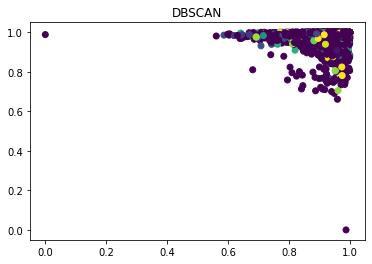

In [ ]:
plt.scatter(distance_array[:,0], distance_array[:,1],c=modeldbcluster.labels_)
plt.title("DBSCAN")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


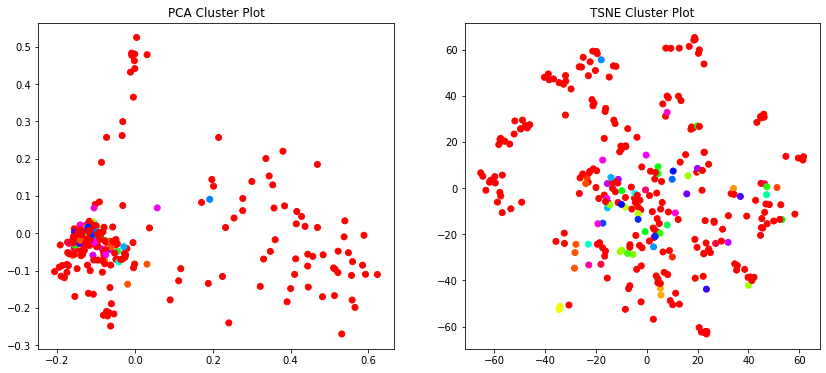

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

def dbplot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
dbplot_tsne_pca(transformedDocs, modeldbcluster.labels_)

kaynaklar
https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

https://medium.com/@MSalnikov/text-clustering-with-k-means-and-tf-idf-f099bcf95183



**Classification Kısmı**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

mlb_train_labels = mlb.fit_transform(train_labels)
mlb_test_labels = mlb.transform(test_labels)

train_tfidfconvert = TfidfVectorizer(analyzer=tokenize, ngram_range=(1,3)).fit(text_train)
test_tfidfconvert = TfidfVectorizer(analyzer=tokenize, ngram_range=(1,3)).fit(text_test)

train_transformedDocs = tfidfconvert.transform(text_train)
test_transformedDocs = tfidfconvert.transform(text_test)





/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:532: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [ ]:
classifier = OneVsRestClassifier(LinearSVC(random_state=42))
classifier.fit(train_transformedDocs, mlb_train_labels)

predictions = classifier.predict(test_transformedDocs)


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(mlb_test_labels, predictions, average='micro')
recall = recall_score(mlb_test_labels, predictions, average='micro')
f1 = f1_score(mlb_test_labels, predictions, average='micro')
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}\n".format(precision, recall, f1))

precision = precision_score(mlb_test_labels, predictions, average='macro')
recall = recall_score(mlb_test_labels, predictions,average='macro')
f1 = f1_score(mlb_test_labels, predictions, average='macro')
print("Macro-average quality numbers\nThis does not take label imbalance into account.")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}\n".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.9493, Recall: 0.7903, F1-measure: 0.8626

Macro-average quality numbers
This does not take label imbalance into account.
Precision: 0.5954, Recall: 0.3826, F1-measure: 0.4509



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


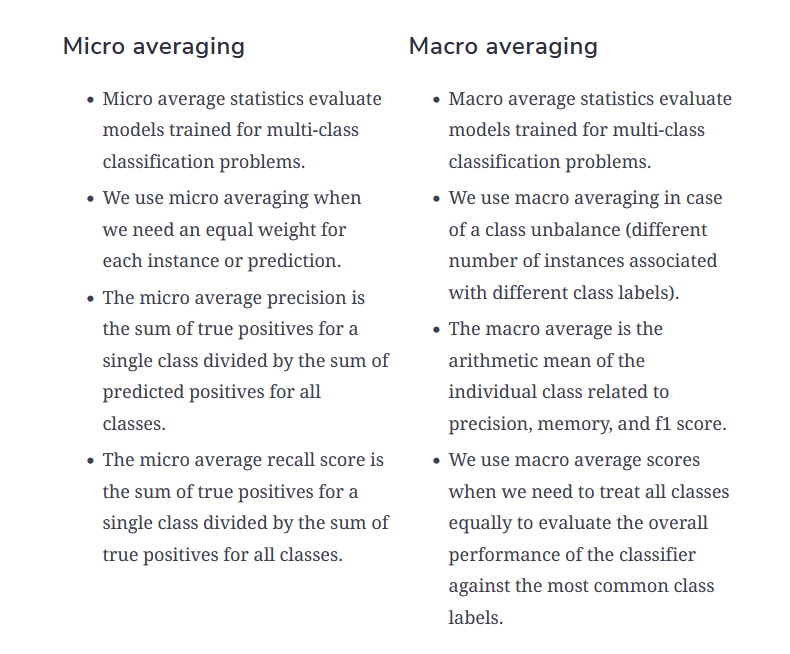